# HepMC3 Interface: IO and visualization

impy uses the pyhepmc library for event IO and visualization. Visualization of the event is useful to understand the particle history. Not all generators produce a history. Here we generate an event with Pythia6 which has full history.

For the visualization to work, the optional package graphviz is required.

In [1]:
import impy.models as im
from impy.kinematics import EventKinematics
from impy.constants import GeV
from particle import literals as lp, Particle

In [2]:
ekin = EventKinematics(
    ecm=15 * GeV, p1pdg=2212, p2pdg=2212
)

model = im.Pythia6(ekin, seed=1)

# decay pi0 in the generator
model.set_stable(lp.pi_0.pdgid, False)

# generate one event
for event in model(1):
    pass

1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                                          **
 **                                                                          **
 **              *......*                  Welcome to the Lund Monte Carlo!  **
 **         *:::!!:::::::::::*                                               **
 **      *::::::!!::::::::::::::*          PPP  Y   Y TTTTT H   H III   A    **
 **    *::::::::!!::::::::::::::::*        P  P  Y Y    T   H   H  I   A A   **
 **   *:::::::::!!:::::::::::::::::*       PPP    Y     T   HHHHH  I  AAAAA  **
 **   *:::::::::!!:::::::::::::::::*       P      Y     T   H   H  I  A   A  **
 **    *::::::::!!::::::::::::::::*!       P      Y     T   H   H III A   A  **
 **      *::::::!!::::::::::::::* !!    

To get a look at the event, we can call its `repr`, but the output is a bit confusing. impy gives access to the Fortran HepEvt record, which is a very compact and efficient format, but it is not easy to see what is going on.

In [3]:
event

PYTHIA6Event(kin=Event kinematics:
	ecm      :   15.00000
	pcm      :    7.38169
	elab     :  118.96325
	plab     :  118.95955
	gamma_cm :    7.99343
	bgamm_cm :    7.93064
	pdgid 1  :       2212
	nucprop 1: 1/1.0
	pdgid 2  :       2212
	nucprop 2: 1/1.0
, frame='center-of-mass', nevent=0, pid=array([2212, 2212,    2,    2,    2,    2,    2,    2,    2, 2103,    2,
       2103,   92,  211, -213, 2224, -213,   92,  211,  223,  223,  113,
       2112, -211,  111, 2212,  211, -211,  111, -211,  211,  111,   22,
        111,  211, -211,   22,   22,   22,   22,   22,   22,   22,   22],
      dtype=int32), status=array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32), charge=array([ 1.        ,  1.        ,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.33333333,
        0.66666667,  0.33333333,  0.        ,  1.        , -1.     

Fundamentally, a collision is a directed graph. The HepMC3 library represents events directly in graph format. This is particularly useful to visualize the event. We convert the impy event to HepMC3 format.

In [4]:
hev = event.to_hepmc3()

The HepMC3 event consists of particles and vertices. You can traverse the graph up and down to follow all ancestors of a final state particle.

In [5]:
def name_from_id(pid):
    try:
        name = Particle.from_pdgid(pid).name
    except Exception:
        name = "Unknown"
    return f"{name} ({pid})" 

# get one final state particle
for p in hev.particles:
    if p.status == 1: # final state
        break

# print particle and its parents
while True:
    print(f"{name_from_id(int(p.pid))} E={p.momentum.e / GeV:.3g} status={p.status}")
    if not p.production_vertex.particles_in:
        break
    p = p.production_vertex.particles_in[0]
    

pi+ (211) E=0.579 status=1
Unknown (92) E=6.21 status=2
u (2) E=3.37 status=2
u (2) E=3.37 status=3
u (2) E=3.08 status=3
u (2) E=3.08 status=3
p (2212) E=7.5 status=3


If you have `graphviz` installed, the HepMC3 event will be visualized directly in the notebook.

In [6]:
hev

GenEvent(momentum_unit=1, length_unit=0, event_number=0, particles=[GenParticle(FourVector(0, 0, 7.44108, 7.5), mass=0.93827, pid=2212, status=3), GenParticle(FourVector(0, 0, -7.44108, 7.5), mass=0.93827, pid=2212, status=3), GenParticle(FourVector(2.72845, 1.28776, 0.62737, 3.08161), mass=-0, pid=2, status=3), GenParticle(FourVector(0.102731, -1.05753, -3.05625, 3.23567), mass=-0, pid=2, status=3), GenParticle(FourVector(2.72845, 1.28776, 0.62737, 3.08161), mass=0, pid=2, status=3), GenParticle(FourVector(0.102731, -1.05753, -3.05625, 3.23567), mass=0, pid=2, status=3), GenParticle(FourVector(3.1589, 1.06236, 0.361552, 3.36851), mass=0.33, pid=2, status=3), GenParticle(FourVector(-0.327724, -0.832128, -2.79043, 2.94877), mass=0.33, pid=2, status=3), GenParticle(FourVector(3.1589, 1.06236, 0.361552, 3.36851), mass=0.33, pid=2, status=2), GenParticle(FourVector(-0.102731, 1.05753, -2.51657, 2.83848), mass=0.77133, pid=2103, status=2), GenParticle(FourVector(-0.327724, -0.832128, -2.79043, 2.94877), mass=0.33, pid=2, status=2), GenParticle(FourVector(-2.72845, -1.28776, 4.94544, 5.84424), mass=0.77133, pid=2103, status=2), GenParticle(FourVector(3.05617, 2.11989, -2.15502, 6.20699), mass=4.47757, pid=92, status=2), GenParticle(FourVector(0.114346, 0.263094, -0.482997, 0.578844), mass=0.13957, pid=211, status=1), GenParticle(FourVector(1.6672, 0.918271, 0.38787, 2.15403), mass=0.930919, pid=-213, status=2), GenParticle(FourVector(0.535113, 0.788663, -0.999126, 1.85644), mass=1.24088, pid=2224, status=2), GenParticle(FourVector(0.73951, 0.14986, -1.06076, 1.61769), mass=0.960397, pid=-213, status=2), GenParticle(FourVector(-3.05617, -2.11989, 2.15502, 8.79301), mass=7.67064, pid=92, status=2), GenParticle(FourVector(0.0181354, 0.177848, -0.0361452, 0.229663), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.354365, -0.487735, -1.77491, 2.0323), mass=0.785141, pid=223, status=2), GenParticle(FourVector(-0.101343, -0.383042, -0.148426, 0.878864), mass=0.770312, pid=223, status=2), GenParticle(FourVector(-0.370528, -0.67705, 0.338167, 1.09591), mass=0.70069, pid=113, status=2), GenParticle(FourVector(-2.24807, -0.749909, 3.77633, 4.55628), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(1.25541, 0.962486, 0.562495, 1.68473), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.41179, -0.0442151, -0.174625, 0.469297), mass=0.13498, pid=111, status=2), GenParticle(FourVector(0.631547, 0.808212, -0.928271, 1.67155), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(-0.0964334, -0.0195488, -0.0708556, 0.184883), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.643515, 0.496007, -0.83039, 1.17011), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.0959952, -0.346147, -0.230371, 0.447575), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.214261, 0.0551213, -0.345127, 0.433057), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.227481, -0.373216, -1.12635, 1.21621), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.087377, -0.16964, -0.303438, 0.383023), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.330745, -0.0819394, -0.295389, 0.450956), mass=0, pid=22, status=1), GenParticle(FourVector(0.229402, -0.301102, 0.146963, 0.427909), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.212684, -0.769054, 0.294337, 0.861854), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.157844, 0.0920044, 0.0438305, 0.234052), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.0292656, -0.00804804, 0.0221837, 0.0375947), mass=0, pid=22, status=1), GenParticle(FourVector(0.382525, -0.0361671, -0.196809, 0.431702), mass=0, pid=22, status=1), GenParticle(FourVector(0.115948, -0.187946, -0.162986, 0.274467), mass=0, pid=22, status=1), GenParticle(FourVector(-0.0199523, -0.158201, -0.0673846, 0.173108), mass=0, pid=22, status=1), GenParticle(FourVector(0.0204204, 0.00723335, -0.111426, 0.113512), mass=0, pid=22, status=1), GenParticle(

This scalable SVG image is generated with the function `pyhepmc.view.to_dot`, which produces a `DiGraph` object. It is possible to manipulate this object, for example, to change the size of the image. For details, see the `graphviz` docs.

In [7]:
from pyhepmc.view import to_dot

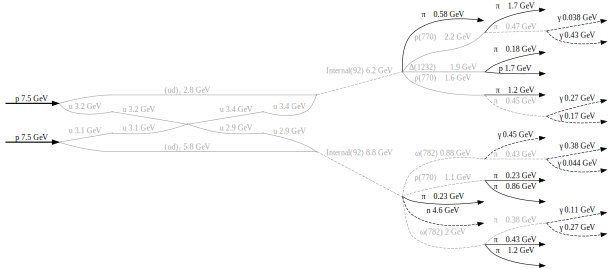

In [8]:
d = to_dot(hev)
d.graph_attr["size"] = "8.5,7"
d

One can also change the engine to produce a very different visualization.

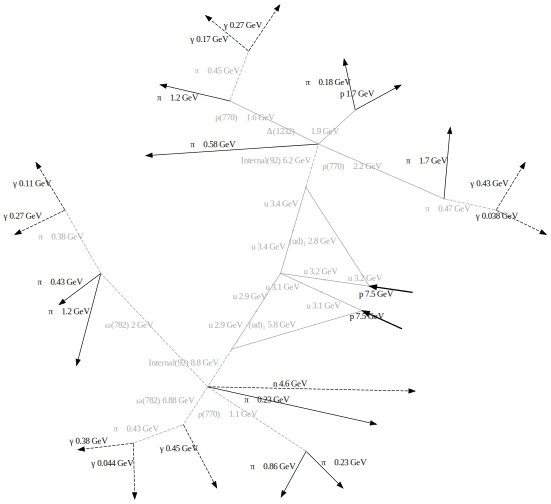

In [9]:
d.engine = "twopi"
d

Also important is the ability to save events and to pass them to other HEP software. The HepMC format is the common language in particle physics, which all tools understand. `pyhepmc` offers a Pythonic way to read/write events with an `open` function.

impy events can be written to disk directly without manual conversion to HepMC3 format, because `pyhepmc` respects the following protocol. If a foreign event object has a method called `to_hepmc3`, it is called to convert the event automatically before writing.

In [10]:
import pyhepmc

with pyhepmc.open("pythia6.dat", "w") as f:
    f.write(event)  # both event and hev work here

The format is human-readable ASCII.

In [11]:
with open("pythia6.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
E 0 21 44
U GEV MM
P 1 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 7.4410785110157258e+00 7.5000000000000009e+00 9.3827000000000005e-01 3
P 2 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 -7.4410785110157258e+00 7.5000000000000009e+00 9.3827000000000005e-01 3
P 3 1 2 2.7284460911882702e+00 1.2877587689887615e+00 6.2736993252246753e-01 3.0816122001090993e+00 -0.0000000000000000e+00 3
P 4 2 2 1.0273056480887965e-01 -1.0575255642133365e+00 -3.0562463339807362e+00 3.2356692571833383e+00 -0.0000000000000000e+00 3
P 5 3 2 2.7284460911882706e+00 1.2877587689887613e+00 6.2736993252246753e-01 3.0816122001090993e+00 0.0000000000000000e+00 3
P 6 4 2 1.0273056480887965e-01 -1.0575255642133363e+00 -3.0562463339807362e+00 3.2356692571833383e+00 0.0000000000000000e+00 3
V -5 0 [5,6]
P 7 -5 2 3.1589002212925266e+00 1.0623615986563364e+00 3.6155230703713870e-01 3.3685134473689571e+00 3.3000000000000002e-01 3
P 8 -5 2 -3.277235652

We can also handle incomplete records, like the one from SIBYLL-2.1.

In [12]:
ekin = EventKinematics(
    ecm=100 * GeV, p1pdg=2212, p2pdg=2212
)

model = im.Sibyll21(ekin, seed=1)

# generate one event
for event2 in model(1):
    pass

 |                                                  |
 |                 S I B Y L L  2.1                 |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |                   Ralph ENGEL                    |
 |           R.S. FLETCHER, T.K. GAISSER            |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | R. Engel et al., Proc. 26th ICRC, 1 (1999) 415   |
 |                                                  |
 | last modified:  28. Sept. 2001 by R. Engel       |


 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    1   1.000E+01    1.45   38.33   30.88   10.83  -0.185   1.964   0.003
    1   1.259E+01    1.49   38.27   31.16   11.10  -0.127   1.949   0.006


Sibyll-2.1 has no particle history and no vertex information. Accordingly, the graph looks a bit boring.

In [13]:
hev2 = event2.to_hepmc3()
hev2

GenEvent(momentum_unit=1, length_unit=0, event_number=0, particles=[GenParticle(FourVector(-0.635971, -0.0672664, 1.59014, 1.87824), mass=0.7683, pid=-213, status=2), GenParticle(FourVector(0.200857, -0.10327, 1.81845, 1.99378), mass=0.7683, pid=213, status=2), GenParticle(FourVector(0.0869196, -0.167857, 11.4413, 11.4439), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.573066, 0.102756, 11.9166, 11.9316), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.482803, 0.131023, 10.6492, 10.7023), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(0.84267, 0.238444, 0.672027, 1.65346), mass=1.231, pid=2224, status=2), GenParticle(FourVector(-0.539898, 0.0418962, 0.542579, 0.791132), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.170536, 0.119178, 3.03662, 3.14531), mass=0.7683, pid=213, status=2), GenParticle(FourVector(-0.109312, -0.116333, 7.3606, 7.40231), mass=0.7683, pid=-213, status=2), GenParticle(FourVector(0.109422, -0.203655, -1.68333, 1.70449), mass=0.13497, pid=111, status=1), GenParticle(FourVector(-0.0349611, 0.0250843, -47.3442, 47.3535), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(-0.0979388, -0.239919, 1.03005, 1.07128), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.538038, 0.172651, 0.560101, 0.806984), mass=0.13497, pid=111, status=1), GenParticle(FourVector(0.318482, -0.314527, 1.46222, 1.53983), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.117623, 0.211257, 0.356249, 0.453964), mass=0.13497, pid=111, status=1), GenParticle(FourVector(0.566113, 0.151195, 0.731485, 1.32618), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(0.27656, 0.087249, -0.0594558, 0.32728), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.382078, -0.0516394, 2.38836, 2.42738), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.211541, 0.170818, 0.648286, 0.71795), mass=0.13497, pid=111, status=1), GenParticle(FourVector(-0.127179, 0.16062, 6.08, 6.08505), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.017866, -0.276954, 1.28066, 1.31732), mass=0.13497, pid=111, status=1)], vertices=[GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0))], run_info=None)

The serialized output is more compact, since the vertex entries are optimized away.

In [14]:
with pyhepmc.open("sibyll21.dat", "w") as f:
    f.write(event2)
    
with open("sibyll21.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
E 0 5 21
U GEV MM
P 1 0 -213 -6.3597112894058228e-01 -6.7266426980495453e-02 1.5901356935501099e+00 1.8782439231872559e+00 7.6829999685287476e-01 2
P 2 0 213 2.0085695385932922e-01 -1.0326969623565674e-01 1.8184542655944824e+00 1.9937760829925537e+00 7.6829999685287476e-01 2
P 3 0 -211 8.6919613182544708e-02 -1.6785664856433868e-01 1.1441325187683105e+01 1.1443866729736328e+01 1.3956999778747559e-01 1
P 4 0 211 -5.7306587696075439e-01 1.0275574028491974e-01 1.1916608810424805e+01 1.1931638717651367e+01 1.3956999778747559e-01 1
P 5 0 2112 4.8280328512191772e-01 1.3102297484874725e-01 1.0649200439453125e+01 1.0702265739440918e+01 9.3957000970840454e-01 1
P 6 0 2224 8.4267032146453857e-01 2.3844376206398010e-01 6.7202734947204590e-01 1.6534589529037476e+00 1.2309999465942383e+00 2
P 7 0 -211 -5.3989845514297485e-01 4.1896231472492218e-02 5.4257899522781372e-01 7.9113227128982544e-01 1.3956999778747559e-01 1
P 8 0 213 1.705355644226